## 최적 포트폴리오를 선택하는 과정
1. 지배원리에 따라 전체투자기회집합에서 효율적 투자선을 찾음
2. 기대효율을 극대화하기 위해 투자자의 위험회피 성향이 보여주는 무차별곡선과 효율적 투자선이 접하는 최적 포트폴리오를 찾아냄. (포트폴리오 분리 정리)

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib as mpl

# 다섯개 종목으로 비중을 바꿔가며 포트폴리오 생성
tickers = ["AAPL", "F", "AMZN", "GE", "TSLA"]

pxclose = pd.DataFrame()

for t in tickers:
    pxclose[t] = web.DataReader(t, data_source="yahoo", start="01-01-2019", end="31-12-2019")["Adj Close"]

print(pxclose.head())

                 AAPL         F         AMZN         GE       TSLA
Date                                                              
2018-12-31  38.233887  6.982526  1501.969971  57.471905  66.559998
2019-01-02  38.277519  7.210714  1539.130005  61.116104  62.023998
2019-01-03  34.464802  7.101184  1500.280029  61.192028  60.071999
2019-01-04  35.936077  7.375008  1575.390015  62.482677  63.537998
2019-01-07  35.856091  7.566685  1629.510010  66.354622  66.991997


In [5]:
# 종가의 수익률 계산

ret_daily = pxclose.pct_change()

ret_daily.head()

,AAPL,F,AMZN,GE,TSLA
Date,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.001141,0.03268,0.024741,0.063408,-0.068149
2019-01-03,-0.099607,-0.01519,-0.025242,0.001242,-0.031472
2019-01-04,0.042689,0.03856,0.050064,0.021092,0.057697
2019-01-07,-0.002226,0.02599,0.034353,0.061968,0.054361


In [6]:
# 일간수익률과 공분산을 연간 데이터로 생성

ret_annual = ret_daily.mean() * 250

cov_daily = ret_daily.cov()
cov_annual = cov_daily * 250

cov_annual.head()

,AAPL,F,AMZN,GE,TSLA
AAPL,0.067779,0.021514,0.034993,0.031903,0.042230
F,0.021514,0.074302,0.023130,0.041478,0.014100
AMZN,0.034993,0.023130,0.052069,0.031914,0.030872
GE,0.031903,0.041478,0.031914,0.164647,0.042609
TSLA,0.042230,0.014100,0.030872,0.042609,0.241315


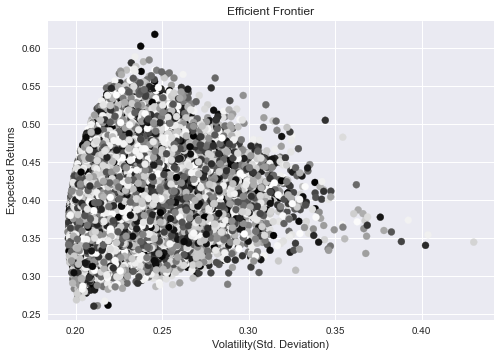

In [10]:
# 포트폴리오 수익률, 변동성, 투자 비중을 저장할 변수

p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)

n_ports = 30000  # 포트폴리오 갯수

for s in range(n_ports):
    wgt = np.random.random(n_assets)  # 종목별 매수비중
    wgt /= np.sum(wgt)

    # 기대수익률 계산
    ret = np.dot(wgt, ret_annual)

    # 변동성 계산
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))

    p_returns.append(ret)
    p_volatility.append(vol)
    p_weights.append(wgt)

# visualizing
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)

colors = np.random.randint(0, n_ports, n_ports)

plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o')
plt.xlabel("Volatility(Std. Deviation)")
plt.ylabel("Expected Returns")
plt.title("Efficient Frontier")
plt.show()